In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Audio,Video
plt.style.use("/Users/tjwilli/jupyter.mplstyle")

In [164]:
#Functions

def potential(x):
    d = 0.01
    x0 = 0.6
    v = np.zeros_like(x)
    mask = (x>=x0) & (x<=x0+d)
    v[mask] = 2.45e5 * .25 / 2
    #v[~mask] = 2.45e5
    #v = 2e5 * x
    #v = 3.1e4*np.exp(-(x-0.7)**2/0.2**2)
    #v = 1e5*np.exp(-(x-0.8)**2/0.4**2)
    return v

def psi_initial(x,x0,sigma):
    return (
        1/(np.pi)**.25/sigma**.5 *
        np.exp(
            -0.5 * (x-x0)**2 / sigma**2
        )
        *
        np.exp(1j*250*(x-x0))
    )
    #x_var = sigma**2
    #A=1/(2*np.pi*x_var)**(1/4.)
    #e1=np.exp(-(x-x0)**2/(4*x_var))
    #e2=np.exp(1.j*k0*(x-x0))
    #val=A*e1*e2

def get_C_matrix(V,dx,dt):
    #Get H matrix
    Hdiag = np.diag( -1j * (1/dx**2 + V),0 )
    offdiag_elems = np.ones_like(x)[:-1] * 1j / 2 / dx**2
    Hdiaglow = np.diag( offdiag_elems, k=-1 )
    Hdiaghi = np.diag( offdiag_elems, k=1 )
    Hoffdiag = Hdiaglow + Hdiaghi
    H = Hdiag + Hoffdiag
    print(np.diag(H))
    #Get A and B
    iden = np.identity(x.size)
    A = iden - dt / 2 * H
    B = iden + dt / 2 * H
    #Get C
    Ainv = np.linalg.inv(A)
    C = np.matmul(Ainv,B)
    return C

In [171]:
#Setup grid
x0 = 0
x1 = 1.5
t0 = 0
t1 = 0.003
dx = 5e-4
dt = 5e-7
x = np.arange(x0,x1,dx)
t = np.arange(t0,t1,dt)

#Get V and psi initial

V = potential(x)
sigma = np.sqrt(0.004)
xmean = 0.3
psi0 = psi_initial(x,xmean,sigma)
C = get_C_matrix(V,dx,dt)

psi_t = []
psi_t.append( psi0 )
for time in t:
    psi_t.append( np.dot(C,psi_t[-1]) )

[0.-4000000.j 0.-4000000.j 0.-4000000.j ... 0.-4000000.j 0.-4000000.j
 0.-4000000.j]


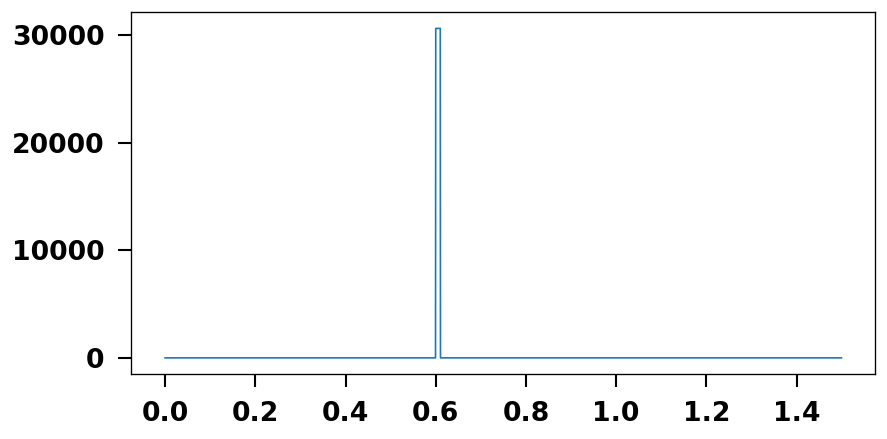

In [172]:
plt.plot(x,potential(x))

0.0 % (0.9999999999901437+0j)


/Users/tjwilli/software/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


5.0 % (0.9999999999904429+0j)
10.0 % (0.9999999999903648+0j)
15.0 % (0.9999999999902855+0j)
20.0 % (0.9999999999902083+0j)
25.0 % (0.9999999999901301+0j)
30.0 % (0.9999999999900527+0j)
35.0 % (0.9999999999899777+0j)
40.0 % (0.9999999999899087+0j)
45.0 % (0.9999999999898429+0j)
50.0 % (0.9999999999897733+0j)
55.00000000000001 % (0.9999999999896975+0j)
60.0 % (0.9999999999896204+0j)
65.0 % (0.9999999999895421+0j)
70.0 % (0.9999999999894642+0j)
75.0 % (0.9999999999893809+0j)
80.0 % (0.9999999999885844+0j)
85.0 % (0.9999999999214453+0j)
90.0 % (0.9999999970801039+0j)
95.0 % (0.9999999367181691+0j)


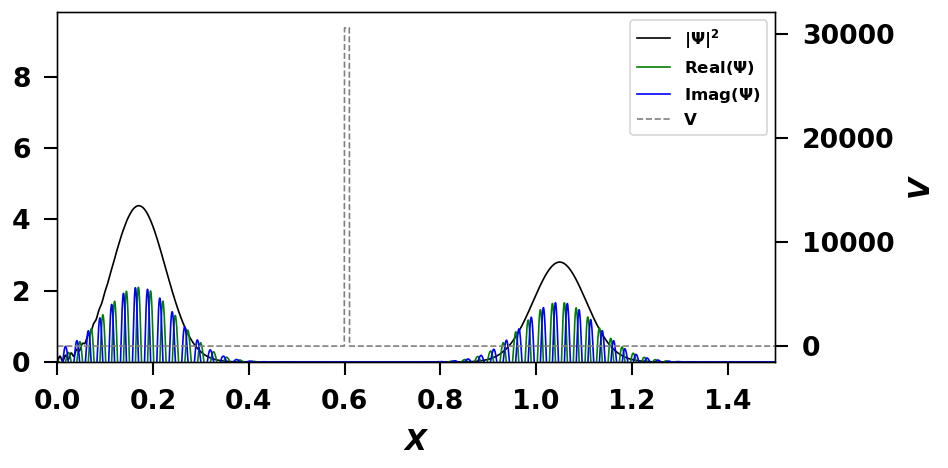

In [173]:
fname = 'animation/qm_barrier_wide.mp4'
fig = plt.figure( figsize=(8,4) )
ax = plt.gca()

wvfunplot, = ax.plot([],[],c='k',label=r'$|\Psi|^2$')
realplot,  = ax.plot([],[],c='green',label=r'Real$(\Psi)$')
imagplot,  = ax.plot([],[],c='blue',label=r'Imag$(\Psi)$')
ax.set_ylim(0, 1.1*np.real(max(psi0*np.conj(psi0))) )
ax.set_xlim(x0,x1)
ax.set_xlabel(r'$X$')
ax2 = ax.twinx()
vplot, = ax2.plot(x,V,c='gray',ls='--',label='V')
ax2.set_ylabel(r'$V$')
lns = [wvfunplot] + [realplot] + [imagplot] + [vplot]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.tight_layout()
def init():
    wvfunplot.set_data([],[])
    realplot.set_data([],[])
    imagplot.set_data([],[])
    return wvfunplot,realplot,imagplot

def animate(i):
    prob = np.conj(psi_t[i])*psi_t[i]
    wvfunplot.set_data(x,prob)
    realplot.set_data(x,np.real(psi_t[i]))
    imagplot.set_data(x,np.imag(psi_t[i]))
    if i % int(t.size/20) == 0:
        print( i / t.size * 100, "%", np.trapz(prob,x))
    return wvfunplot,realplot,imagplot

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=2, blit=True)

anim.save(fname)
#Audio("buzzer3_x.wav",autoplay=True)

In [174]:
Video(fname)

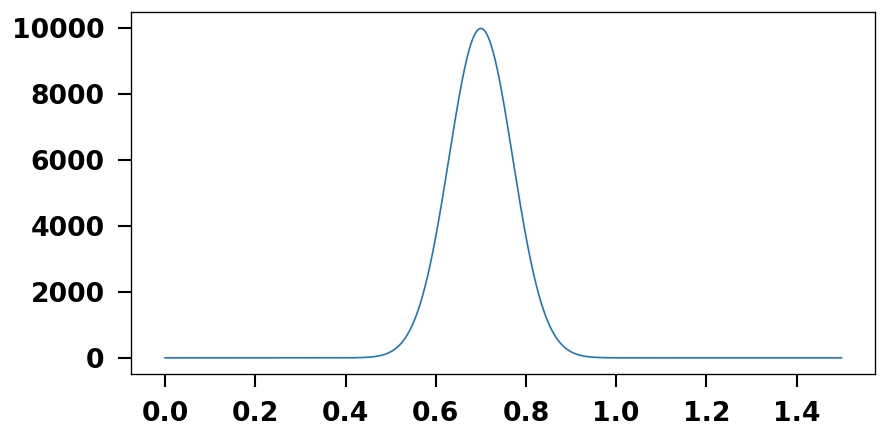

In [57]:
plt.plot(x,1e4*np.exp(-(x-0.7)**2/0.1**2))

In [ ]:
x0 = -.5
x1 = 1
t0 = 0
t1 = 1e-3
dx = 5e-4
dt = 5e-7
x = np.arange(x0,x1,dx)
t = np.arange(t0,t1,dt)

#Get V and psi initial

V = potential(x)
sigma = 0.004
xmean = 0.2
psi0 = psi_initial(x,xmean,sigma)

In [ ]:
q=dt/(4.*dx**2)
Q=1.+2.*1.j*q+1.j*dt/2.*V
U=1.-2.*1.j*q-1.j*dt/2.*V

iden = np.identity(x.size)
diag = np.diag(np.ones(x.size-1),-1) + np.diag(np.ones(x.size-1),1)
A=np.array(iden,dtype=complex)*Q+np.array(diag,dtype=complex)*-1.j*q
B=np.array(iden,dtype=complex)*U+np.array(diag,dtype=complex)*1.j*q

In [ ]:
C2 = np.matmul(np.linalg.inv(A),B)